Activitat 2: Quin és l’isòtop d’oxigen més pesat?

En aquesta activitat, investigareu els isòtops d’oxigen més exòtics que encara no s’han observat experimentalment. Utilitzareu la fórmula del MGL per predir quin és l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva.

A continuació, reproduïm la Taula 1 de l’activitat anterior.

Figura 3: mostra l'energia d'enllaç per nucleó (E/A), mesurada experimentalment i calculada teòricament, com a la Figura 2 anteriorment, però ampliada per mostrar els nombres de masses de A=12 a A=200. El MGL es pot fer servir per predir l'energia d'enllaç per nucleó d’isòtops d’oxigen amb masses molt més grans que les observades experimentalment (que tenen un nombre de masses entre A=13 i A=25). Les dades utilitzades per crear la Figura 3 es mostren a la Taula 3 a la part inferior de la pàgina. S’utilitzen les dades de la Taula 1 en els càlculs teòrics.

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib nbagg

<IPython.core.display.Javascript object>


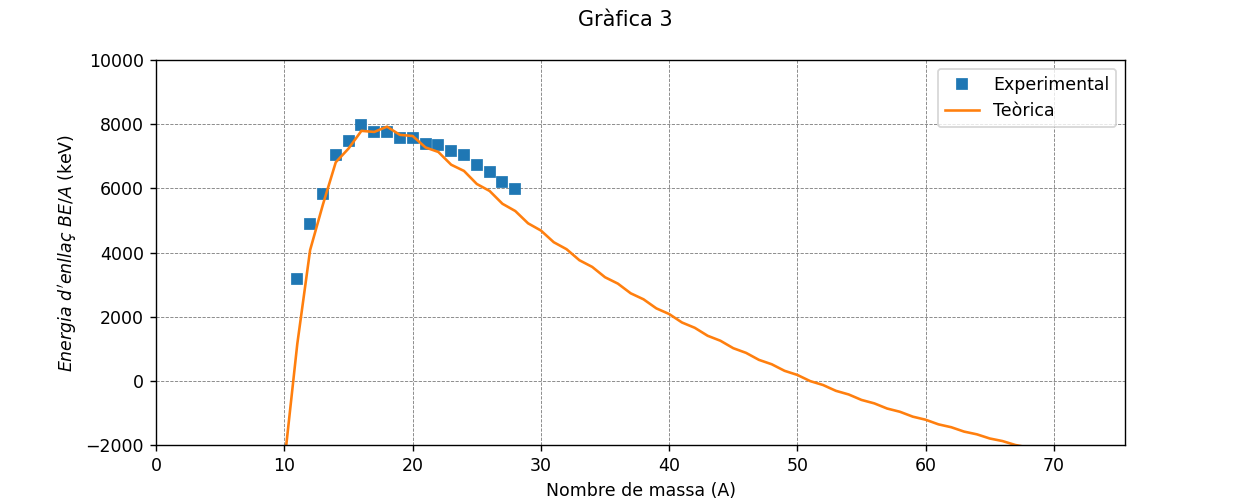

interactive(children=(Text(value='O', description='Element:', placeholder="Nom de l'element"), BoundedFloatTex…

In [7]:
def extract(x):
    global extract_n
    extract_n = df.loc[df['Element'] == x]
    return

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

fig, ax = plt.subplots(nrows=1, figsize=(10,4))
plt.suptitle('Gràfica 3')
style = {'description_width': '200px'}
layout = widgets.Layout(width='300px') 

def update_plot(element, av, aS, ac, aA, ap):
    global A, y, df
    '''
    this function is linked to the slider and
    it replots the binding energy by nucleon when the slider are changed
    '''
    df = pd.read_fwf('mass_1.mas20.txt',    
                 usecols=(2, 3, 4, 6, 11),
                 names=['N', 'Z', 'A', 'Element', 'Experimental'],
                 widths=(1,3,5,5,5,1,3,4,1,14,12,13,1,10,1,2,13,11,1,3,1,13,12,1),
                 header=28, 
                 index_col=False)
    df['Experimental'] = pd.to_numeric(df.Experimental.str.replace('#',''))
    extract(element)
    df = extract_n
    df.reset_index(drop=True, inplace=True) 
    if not df.empty:
        Z = df.at[0, 'Z']
    else:
        Z=0
    A = np.linspace(1, 9 * Z, 9 * Z, dtype=int)
    ax.clear()
    y = (av*A-aS*pow(A,2/3)-ac*pow(Z,2)*pow(A,-1/3)-aA*pow(A-2*Z,2)/A + ((A % 2)==0) * ap/np.sqrt(A))*1000/A
    extract_n.plot(x='A',y='Experimental', marker='s', linestyle = 'None', ax=ax)
    ax.plot(A, y, label='Teòrica')
    ax.legend(loc=1)
    ax.set_xlabel('Nombre de massa (A)')
    ax.set_ylabel('$Energia \ d\'enllaç \ BE/A$ (keV)')
    ax.set_xlim(0, )
    ax.set_ylim(-2000, 10000)
    ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.show()
    if not df.empty:
        tol = tol = np.abs(find_nearest(y[df.A.iloc[-1]:],0))
        index = np.where(np.isclose(y, 0,atol=tol))[0][0]
        out=widgets.Output()
        with out:
            display(A[index])
        grid[0,0]  = out
    else:
        print('')
    
    return 

element = widgets.Text(
          value='O',
          placeholder='Nom de l\'element',
          description='Element:',
          disabled=False
          )

av = widgets.BoundedFloatText(value=16, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Volum:', 
                              disabled=False,
                              style=style,
                              layout=layout)

aS = widgets.BoundedFloatText(value=18.3, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Superficie:', 
                              disabled=True,
                              style=style,
                              layout=layout)

ac = widgets.BoundedFloatText(value=0.714, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Coulomb:', 
                              disabled=True,
                              style=style,
                              layout=layout)

aA = widgets.BoundedFloatText(value=23, 
                              min=0, 
                              max=50, 
                              step=0.1, 
                              description='Asimetria:', 
                              disabled=False,
                              style=style,
                              layout=layout)

ap = widgets.BoundedFloatText(value=12, 
                              min=0, 
                              max=20, 
                              step=0.1, 
                              description='Emparellament:', 
                              disabled=True,
                              style=style,
                              layout=layout)

grid = widgets.GridspecLayout(1,1, height='auto')
widgets.interactive(update_plot, element=element, av=av, aS=aS, ac=ac, aA=aA, ap=ap)

En aquesta segona part del repte, fem servir els paràmetres del model de l’Activitat 1 per predir les propietats dels isòtops d’oxigen encara no descoberts.

Les tasques es mostren a continuació en cursiva. Les respostes a les preguntes amb una (Q) al costat es demanaran al Questionari https://forms.gle/VKatCBGW3dMXGtJG7.

Activitat 2a

(Q) Quin és l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva?

Introduïu els valors dels termes de volum i asimetria a la taula 1 anterior. El full de càlcul calcularà immediatament l’isòtop d’oxigen més pesat i us en  proporcionarà el valor.

In [3]:
grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')),), layout=Layout(grid_template_areas='"w…

Teniu en compte que el valor que us proporcionem és la x que intersectaa amb l'eix del vostre gràfic. Per què un nucli pugui existir (i no decaigui espontàniament), ha de tenir un valor positiu de E/A (l’eix y del gràfic)

Activitat 2b

Avaluació de la incertesa en el terme d’asimetria.

Si suposem que, per a la constant de terme d’asimetria, tots els valors de l'interval entre 20 i 25 MeV són possibles (segons les dades d’oxigen avaluades en l'apartat anterior), busqueu el rang de prediccions per a l’isòtop d’oxigen més pesat amb una energia d’enllaç positiva. Introduïu les vostres respostes als requadres següents.

In [4]:
display(av,aA)

BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.0, step=0.1, style=Des…

BoundedFloatText(value=23.0, description='Asimetria:', layout=Layout(width='300px'), max=50.0, step=0.1, style…

Activitat 2c

Avaluació de la incertesa en el terme del volum.

Si suposem que, per a la constant terme de volum, són possibles tots els valors dins d’un interval de 15-17 MeV (segons les vostres dades d’oxigen), busqueu el rang de prediccions per a l’isòtop d’oxigen més pesat amb una energia d'enllaç positiva. Introduïu les respostes als requadres següents.

In [5]:
display(av,aA)

BoundedFloatText(value=16.0, description='Volum:', layout=Layout(width='300px'), max=20.0, step=0.1, style=Des…

BoundedFloatText(value=23.0, description='Asimetria:', layout=Layout(width='300px'), max=50.0, step=0.1, style…

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')